In [1]:
#Importing necessary libraries
!pip install wordcloud
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
import re
nltk.download(
    [
      'stopwords',
      'punkt',
      'wordnet',
      'omw-1.4',
      'vader_lexicon'
    ]
)
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [2]:
#reading csv file into python environment
rev = pd.read_csv("tourist_accommodation_reviews.csv")

In [3]:
#previewing the data
rev.head(50)

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...
5,rn572308369,"Reviewed April 9, 2018",Kathu,Thong Dee The Kathu Brasserie,We travel to Phuket every year from Australia ...
6,rn572053040,"Reviewed April 8, 2018",Kathu,Thong Dee The Kathu Brasserie,Had roast beef and lamb plenty of it and very ...
7,rn571915434,"Reviewed April 8, 2018",Kathu,Thong Dee The Kathu Brasserie,This place has a lot to learn when it comes to...
8,rn571792182,"Reviewed April 7, 2018",Kathu,Thong Dee The Kathu Brasserie,This restaurant oozes class as soon as you ent...
9,rn571778672,"Reviewed April 7, 2018",Kathu,Thong Dee The Kathu Brasserie,"Put simply, just one of the best dining experi..."


In [4]:
rev.tail(10)

,ID,Review Date,Location,Hotel/Restaurant name,Review
53634,rn166420983,"Reviewed July 5, 2013",Patong,Bite in,"Great food, fast service and nice ambience! Re..."
53635,rn166257602,"Reviewed July 4, 2013",Patong,Bite in,Good quality meals. A bit more expensive than ...
53636,rn163636928,"Reviewed June 10, 2013",Patong,Bite in,We discover this restaurant during our trip in...
53637,rn163249768,"Reviewed June 7, 2013",Patong,Bite in,I wanted to go in this restaurant on last week...
53638,rn163047718,"Reviewed June 5, 2013",Patong,Bite in,we came here for lunch with our family.\r\nRes...
53639,rn162368197,"Reviewed May 29, 2013",Patong,Bite in,"I love this small restaurant, for the great fo..."
53640,rn161843734,"Reviewed May 25, 2013",Patong,Bite in,We stopped at this restaurant after shopping a...
53641,rn161734077,"Reviewed May 24, 2013",Patong,Bite in,"Great times ,This is one of the best restauran..."
53642,rn161218072,"Reviewed May 19, 2013",Patong,Bite in,"Bite in, it has become my favorite restaurant ..."
53643,rn161212765,"Reviewed May 19, 2013",Patong,Bite in,The restaurant put in a good location in Jungc...


In [5]:
#checking for null values
rev.isna().sum()

ID                       0
Review Date              0
Location                 0
Hotel/Restaurant name    0
Review                   0
dtype: int64

In [6]:
rev.shape

(53644, 5)

In [7]:
#counting the variables
rev.count()

ID                       53644
Review Date              53644
Location                 53644
Hotel/Restaurant name    53644
Review                   53644
dtype: int64

In [8]:
#exploratory data analysis
rev.describe(include = 'all')

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,53644,53644,53644,53644,53644
unique,49944,2344,25,537,49938
top,rn564592095,Reviewed 1 week ago,Patong,Da Mario,I have been to this restaurant several times f...
freq,10,616,16403,279,10


In [9]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53644 entries, 0 to 53643
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     53644 non-null  object
 1   Review Date            53644 non-null  object
 2   Location               53644 non-null  object
 3   Hotel/Restaurant name  53644 non-null  object
 4   Review                 53644 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


In [10]:
#exploring the locations in the dataset
Location_count = rev["Location"].value_counts().head(50)
print(Location_count)

 Patong              16403
 Karon                5826
 Kata Beach           5752
 Rawai                3811
 Choeng Thale         3378
 Phuket Town          3356
 Kamala               3162
 Mai Khao             2372
 Cape Panwa           1500
 Chalong              1287
 Thalang District     1177
 Kathu                1078
 Nai Yang              996
 Nai Harn              881
 Bang Tao Beach        600
 Karon Beach           397
 Wichit                395
 Talat Yai             300
 Koh Kaew              293
 Kata Noi Beach        200
 Pa Khlok              100
 Ratsada                98
 Talat Nuea             97
 Nai Thon               94
 Sakhu                  91
Name: Location, dtype: int64


In [11]:
#exploring the hotels in the dataset
Hotel_count = rev["Hotel/Restaurant name"].value_counts().head(50)
print(Hotel_count)

Da Mario                                                    279
Sabai Sabai                                                 200
No.6 Restaurant                                             200
The Pizza Company                                           198
The Family Restaurant                                       196
Outdoor Restaurant                                          193
Thong Dee The Kathu Brasserie                               100
Joe's Downstairs                                            100
Full Moon Brewworks - Microbrewery & Lobs n' Roll           100
The Coffee Club - The Turtle Village                        100
Da Maurizio Beach Side                                      100
Pizzeria Hut 1                                              100
Don's Bar B Q                                               100
Rum Jungle                                                  100
The Drunken Leprechaun                                      100
Red Snapper                             

In [12]:
review = Hotel_count.head(30)
print(review)

Da Mario                                                    279
Sabai Sabai                                                 200
No.6 Restaurant                                             200
The Pizza Company                                           198
The Family Restaurant                                       196
Outdoor Restaurant                                          193
Thong Dee The Kathu Brasserie                               100
Joe's Downstairs                                            100
Full Moon Brewworks - Microbrewery & Lobs n' Roll           100
The Coffee Club - The Turtle Village                        100
Da Maurizio Beach Side                                      100
Pizzeria Hut 1                                              100
Don's Bar B Q                                               100
Rum Jungle                                                  100
The Drunken Leprechaun                                      100
Red Snapper                             

In [6]:
#Exploring the data for my location choice
reviews = rev[rev['Location'] == ' Phuket Town']

In [7]:
reviews.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,3356,3356,3356,3356,3356
unique,3126,1367,1,34,3126
top,rn545866943,Reviewed 2 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Visited this restaurant with a party of 8 whic...
freq,6,43,3356,100,6


In [13]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 593 to 53446
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     3356 non-null   object
 1   Review Date            3356 non-null   object
 2   Location               3356 non-null   object
 3   Hotel/Restaurant name  3356 non-null   object
 4   Review                 3356 non-null   object
dtypes: object(5)
memory usage: 157.3+ KB


In [14]:
reviews.isna().sum()

ID                       0
Review Date              0
Location                 0
Hotel/Restaurant name    0
Review                   0
dtype: int64

In [15]:
reviews.value_counts()

ID           Review Date                  Location      Hotel/Restaurant name                               Review                                                                                                                                                                                                                                                                
rn570944047  Reviewed April 4, 2018        Phuket Town  Fuji Japanese Restaurant - Central Festival Phuket  This was fun, we had no idea what was going on or how we were to take part in this food train, but we had a go and had a laugh along the way. Food was nice and different for us, but it was an...More                                                                    6
rn532501000  Reviewed October 12, 2017     Phuket Town  Fuji Japanese Restaurant - Central Festival Phuket  Fuji Restaurant is on the top floor of Central Festival and offers a good location to grab a quick bite whilst enjoying shopping in this splendid

In [17]:
#Checking the first few rows of the data for analysis
reviews.head(10)

,ID,Review Date,Location,Hotel/Restaurant name,Review
593,rn579710123,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,"Wow! What a find true TripAdvisor, so happy to..."
594,rn578870903,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,Best crossover Food i have ever had\r\nI was f...
595,rn576141183,Reviewed 3 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Visited this restaurant based on the reviews b...
596,rn573849598,Reviewed 4 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Me and my husband went for dinner here last ni...
597,rn572956411,"Reviewed April 12, 2018",Phuket Town,Surf and Turf by Soul Kitchen,French chef! Really concerned with the quality...
598,rn569897443,"Reviewed March 31, 2018",Phuket Town,Surf and Turf by Soul Kitchen,The restaurant we wanted to go to was closed a...
599,rn566644875,"Reviewed March 15, 2018",Phuket Town,Surf and Turf by Soul Kitchen,Best place I’ve ate so far in this whole count...
600,rn566507878,"Reviewed March 14, 2018",Phuket Town,Surf and Turf by Soul Kitchen,We wanted some great food to end our trip in T...
601,rn566148749,"Reviewed March 12, 2018",Phuket Town,Surf and Turf by Soul Kitchen,My husband and I went to this restaurant on ou...
602,rn562213565,"Reviewed February 22, 2018",Phuket Town,Surf and Turf by Soul Kitchen,We went with a group of 8 persons for dinner. ...


In [8]:
#Model building using nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()
reviews['pos'] = [sentiment.polarity_scores(review)['pos'] for review in reviews['Review']]
reviews['neg'] = [sentiment.polarity_scores(review)['neg'] for review in reviews['Review']]
reviews['neu'] = [sentiment.polarity_scores(review)['neu'] for review in reviews['Review']]
reviews['compound'] = [sentiment.polarity_scores(review)['compound'] for review in reviews['Review']]

<ipython-input-8-24aa8557ebca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['pos'] = [sentiment.polarity_scores(review)['pos'] for review in reviews['Review']]
<ipython-input-8-24aa8557ebca>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['neg'] = [sentiment.polarity_scores(review)['neg'] for review in reviews['Review']]
<ipython-input-8-24aa8557ebca>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [19]:
reviews.head(30)

,ID,Review Date,Location,Hotel/Restaurant name,Review,pos,neg,neu,compound
593,rn579710123,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,"Wow! What a find true TripAdvisor, so happy to...",0.405,0.000,0.595,0.9765
594,rn578870903,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,Best crossover Food i have ever had\r\nI was f...,0.453,0.000,0.547,0.8908
595,rn576141183,Reviewed 3 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Visited this restaurant based on the reviews b...,0.191,0.000,0.809,0.8720
596,rn573849598,Reviewed 4 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Me and my husband went for dinner here last ni...,0.238,0.000,0.762,0.9035
597,rn572956411,"Reviewed April 12, 2018",Phuket Town,Surf and Turf by Soul Kitchen,French chef! Really concerned with the quality...,0.194,0.100,0.706,0.5067
598,rn569897443,"Reviewed March 31, 2018",Phuket Town,Surf and Turf by Soul Kitchen,The restaurant we wanted to go to was closed a...,0.406,0.056,0.539,0.9611
599,rn566644875,"Reviewed March 15, 2018",Phuket Town,Surf and Turf by Soul Kitchen,Best place I’ve ate so far in this whole count...,0.468,0.000,0.532,0.9845
600,rn566507878,"Reviewed March 14, 2018",Phuket Town,Surf and Turf by Soul Kitchen,We wanted some great food to end our trip in T...,0.248,0.000,0.752,0.9264
601,rn566148749,"Reviewed March 12, 2018",Phuket Town,Surf and Turf by Soul Kitchen,My husband and I went to this restaurant on ou...,0.175,0.000,0.825,0.7814
602,rn562213565,"Reviewed February 22, 2018",Phuket Town,Surf and Turf by Soul Kitchen,We went with a group of 8 persons for dinner. ...,0.000,0.115,0.885,-0.6369


In [20]:
#insights into sentiment scores for review data
reviews[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,3356.000000,3356.000000,3356.000000,3356.000000
mean,0.627195,0.028052,0.753512,0.218434
std,0.439321,0.051155,0.124410,0.131797
min,-0.964600,0.000000,0.287000,0.000000
25%,0.536375,0.000000,0.672750,0.123000
50%,0.816000,0.000000,0.762000,0.209000
75%,0.914800,0.045000,0.840000,0.305000
max,0.990400,0.380000,1.000000,0.713000


<Figure size 1080x576 with 0 Axes>

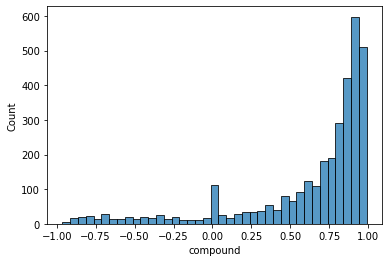

<Figure size 1080x576 with 0 Axes>

In [21]:
sns.histplot(reviews['compound'])
plt.figure(figsize=(15,8))

<Figure size 1080x576 with 0 Axes>

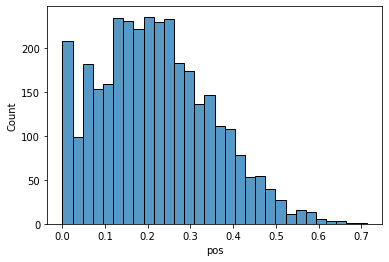

<Figure size 1080x576 with 0 Axes>

In [22]:
sns.histplot(reviews['pos'])
plt.figure(figsize=(15,8))

<Figure size 1080x576 with 0 Axes>

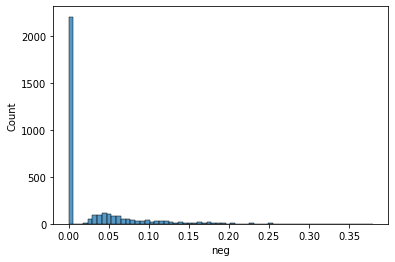

<Figure size 1080x576 with 0 Axes>

In [23]:
sns.histplot(reviews['neg'])
plt.figure(figsize=(15,8))

In [24]:
#Considering how many negative reviews by hotels/restaurant
(reviews['compound']<=0).groupby(reviews['Hotel/Restaurant name']).sum()


Hotel/Restaurant name
Archee Restaurant                                      6
Beach Bar                                             14
Blue Elephant Phuket                                   4
China Inn Cafe                                         6
Crust                                                  6
Dibuk restaurant                                      13
Eleven Two & Co.                                       9
Fuji Japanese Restaurant - Central Festival Phuket     5
Gallery Cafe by Pinky                                  6
Honeymoon Thai Restaurant by Kenya                    10
Khaorang Breeze Restaurant                            10
Kopitiam by Wilai                                     10
La Gaetana                                             7
Le Siam                                               28
MK Gold Restaurant                                    21
Mee Ton Poe                                           10
Mor Mu Dong                                           10
Mr.Coffee

In [25]:
#Calculating negative reviews as a proportion of the total reviews
negatives = pd.DataFrame(
  (reviews['compound']<=0).groupby(reviews['Hotel/Restaurant name']).sum() / 
  reviews['Hotel/Restaurant name'].groupby(reviews['Hotel/Restaurant name']).count()*100,
  columns = ['% Negative Reviews']
).sort_values(by='% Negative Reviews')

negatives

,% Negative Reviews
Hotel/Restaurant name,
OSOT,3.000000
Blue Elephant Phuket,4.000000
Surf and Turf by Soul Kitchen,5.000000
Papaya,5.000000
Fuji Japanese Restaurant - Central Festival Phuket,5.000000
Gallery Cafe by Pinky,6.000000
Crust,6.000000
China Inn Cafe,6.060606
Archee Restaurant,6.185567


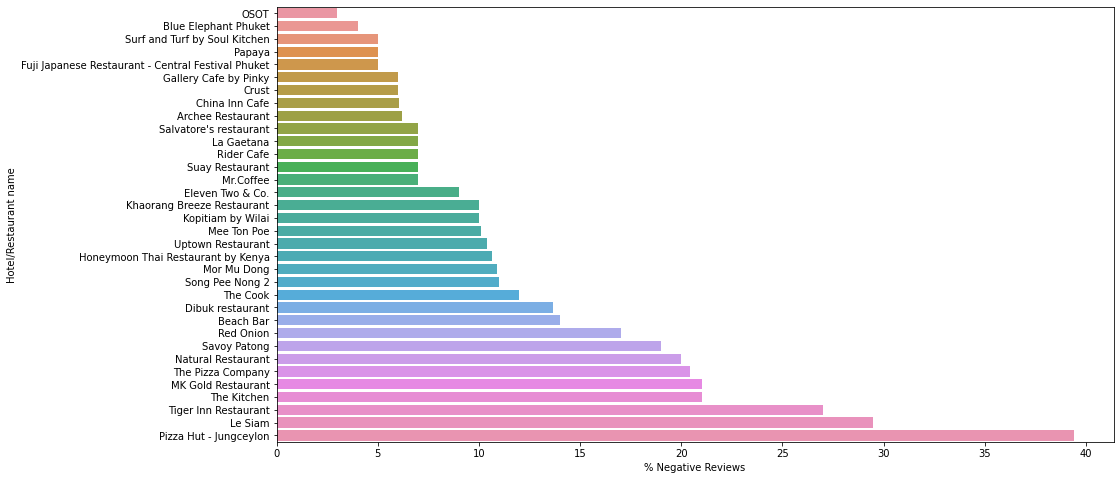

In [26]:
#visualizing using a horizontal bar chart
plt.figure(figsize=(15,8))
sns.barplot(data=negatives, x='% Negative Reviews', y=negatives.index)


In [9]:
#defining the function for the word cloud visualization using text stemming
stop_words = nltk.corpus.stopwords.words('english')

def preprocess_text(text):
  tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
  cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
  return stemmed_text



In [10]:
reviews['processed_reviews'] = reviews['Review'].apply(preprocess_text)

<ipython-input-10-7ab7384a6544>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['processed_reviews'] = reviews['Review'].apply(preprocess_text)


In [11]:
#using wordcloud to visualize restaurant with the most negative reviews
negatives_rev = reviews[reviews['Hotel/Restaurant name'] == 'Pizza Hut - Jungceylon'] 
negatives_rev = reviews[reviews['compound']<=0]

In [30]:
negatives_rev.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,pos,neg,neu,compound,processed_reviews
602,rn562213565,"Reviewed February 22, 2018",Phuket Town,Surf and Turf by Soul Kitchen,We went with a group of 8 persons for dinner. ...,0.000,0.115,0.885,-0.6369,"[went, group, 8, person, dinner, unfortun, arr..."
611,rn553921305,"Reviewed January 15, 2018",Phuket Town,Surf and Turf by Soul Kitchen,This restaurant did not had any menu outside s...,0.000,0.073,0.927,-0.5095,"[restaur, menu, outsid, enter, ask, card, look..."
624,rn543296380,"Reviewed November 26, 2017",Phuket Town,Surf and Turf by Soul Kitchen,Excellent dining experince. Good food. I will ...,0.155,0.164,0.681,-0.3269,"[excel, dine, experinc, good, food, definit, c..."
629,rn531654994,"Reviewed October 10, 2017",Phuket Town,Surf and Turf by Soul Kitchen,We tried to eat here on the desperate evenings...,0.000,0.099,0.901,-0.3614,"[tri, eat, desper, even, restaur, suppos, open..."
671,rn446189254,"Reviewed December 22, 2016",Phuket Town,Surf and Turf by Soul Kitchen,"I had two dinners here, and were my best in Th...",0.060,0.062,0.878,-0.0168,"[two, dinner, best, thailand, differ, dish, ch..."


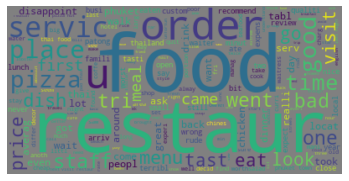

In [12]:
#wordcloud for generating negative reviews
tokens_n = [word for review in negatives_rev['processed_reviews'] for word in review]

wordcloud = WordCloud(background_color = 'grey', ).generate_from_text(' '.join(tokens_n))

wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110)

#displaying the wordcloud image
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [35]:
#reviweing negative words
from nltk.probability import FreqDist
freq = FreqDist(tokens_n)
freq.tabulate(10)

   food restaur   order  servic       u   pizza   place    time    good    thai 
    204     171     127     104      91      87      83      77      72      68 


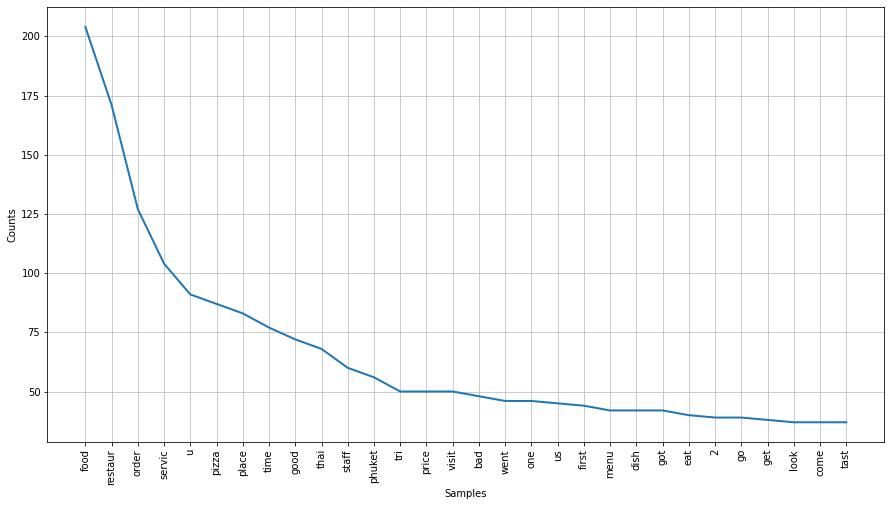

In [36]:
#plot for the value of negative words
plt.figure(figsize=(15,8))
freq.plot(30)


In [13]:
#using wordcloud to visualize restaurant with positive reviews
positive_rev = reviews[reviews['Hotel/Restaurant name'] == 'Pizza Hut - Jungceylon'] 
positive_rev = reviews[reviews['compound']>0]

In [14]:
positive_rev.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,pos,neg,neu,compound,processed_reviews
593,rn579710123,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,"Wow! What a find true TripAdvisor, so happy to...",0.405,0.0,0.595,0.9765,"[wow, find, true, tripadvisor, happi, chanc, d..."
594,rn578870903,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,Best crossover Food i have ever had\r\nI was f...,0.453,0.0,0.547,0.8908,"[best, crossov, food, ever, fulli, satisfi, on..."
595,rn576141183,Reviewed 3 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Visited this restaurant based on the reviews b...,0.191,0.0,0.809,0.8720,"[visit, restaur, base, review, ta, order, beef..."
596,rn573849598,Reviewed 4 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Me and my husband went for dinner here last ni...,0.238,0.0,0.762,0.9035,"[husband, went, dinner, last, night, pleas, fo..."
597,rn572956411,"Reviewed April 12, 2018",Phuket Town,Surf and Turf by Soul Kitchen,French chef! Really concerned with the quality...,0.194,0.1,0.706,0.5067,"[french, chef, realli, concern, qualiti, dish,..."


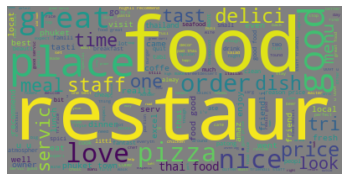

In [15]:
#wordcloud for generating positive reviews
tokens_p = [word for review in positive_rev['processed_reviews'] for word in review]

wordcloud = WordCloud(background_color = 'grey', ).generate_from_text(' '.join(tokens_p))

#displaying the wordcloud image
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [16]:
#reviweing positive words
from nltk.probability import FreqDist
freq = FreqDist(tokens_p)
freq.tabulate(10)

   food    good restaur   place       u   great    thai  servic  phuket   price 
   1992    1280    1040     845     801     794     697     670     626     570 


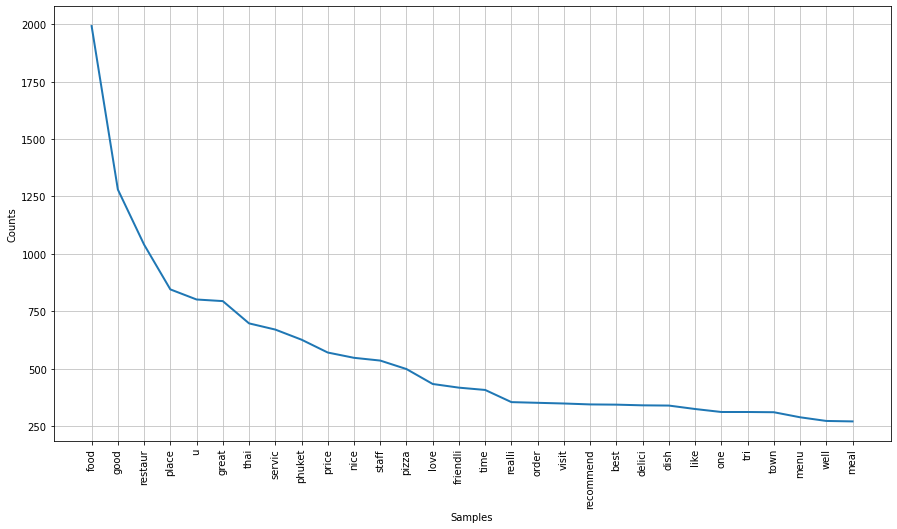

In [41]:
#plot for the value of positive words
plt.figure(figsize=(15,8))
freq.plot(30)

In [18]:
#defining function to give sentiment reviews 
def getAnalysis(score):
 if score < 0:
    return 'Negative'
 elif score == 0:
    return 'Neutral'
 else:
    return 'Positive'

reviews['sentiment'] = reviews['compound'].apply(getAnalysis)

reviews.head(10)

<ipython-input-18-f41d9eb3ab56>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['sentiment'] = reviews['compound'].apply(getAnalysis)


,ID,Review Date,Location,Hotel/Restaurant name,Review,pos,neg,neu,compound,processed_reviews,sentiment
593,rn579710123,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,"Wow! What a find true TripAdvisor, so happy to...",0.405,0.000,0.595,0.9765,"[wow, find, true, tripadvisor, happi, chanc, d...",Positive
594,rn578870903,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,Best crossover Food i have ever had\r\nI was f...,0.453,0.000,0.547,0.8908,"[best, crossov, food, ever, fulli, satisfi, on...",Positive
595,rn576141183,Reviewed 3 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Visited this restaurant based on the reviews b...,0.191,0.000,0.809,0.8720,"[visit, restaur, base, review, ta, order, beef...",Positive
596,rn573849598,Reviewed 4 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Me and my husband went for dinner here last ni...,0.238,0.000,0.762,0.9035,"[husband, went, dinner, last, night, pleas, fo...",Positive
597,rn572956411,"Reviewed April 12, 2018",Phuket Town,Surf and Turf by Soul Kitchen,French chef! Really concerned with the quality...,0.194,0.100,0.706,0.5067,"[french, chef, realli, concern, qualiti, dish,...",Positive
598,rn569897443,"Reviewed March 31, 2018",Phuket Town,Surf and Turf by Soul Kitchen,The restaurant we wanted to go to was closed a...,0.406,0.056,0.539,0.9611,"[restaur, want, go, close, end, instead, happi...",Positive
599,rn566644875,"Reviewed March 15, 2018",Phuket Town,Surf and Turf by Soul Kitchen,Best place I’ve ate so far in this whole count...,0.468,0.000,0.532,0.9845,"[best, place, ate, far, whole, countri, recomm...",Positive
600,rn566507878,"Reviewed March 14, 2018",Phuket Town,Surf and Turf by Soul Kitchen,We wanted some great food to end our trip in T...,0.248,0.000,0.752,0.9264,"[want, great, food, end, trip, thailand, read,...",Positive
601,rn566148749,"Reviewed March 12, 2018",Phuket Town,Surf and Turf by Soul Kitchen,My husband and I went to this restaurant on ou...,0.175,0.000,0.825,0.7814,"[husband, went, restaur, first, night, thailan...",Positive
602,rn562213565,"Reviewed February 22, 2018",Phuket Town,Surf and Turf by Soul Kitchen,We went with a group of 8 persons for dinner. ...,0.000,0.115,0.885,-0.6369,"[went, group, 8, person, dinner, unfortun, arr...",Negative


In [19]:
reviews['sentiment'].value_counts()

Positive    2945
Negative     315
Neutral       96
Name: sentiment, dtype: int64

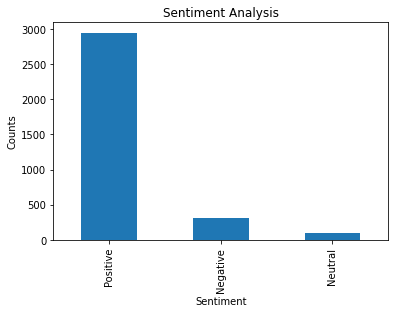

In [20]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
reviews['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

Text(0, 0.5, 'Hotel Reviews Sentiment')

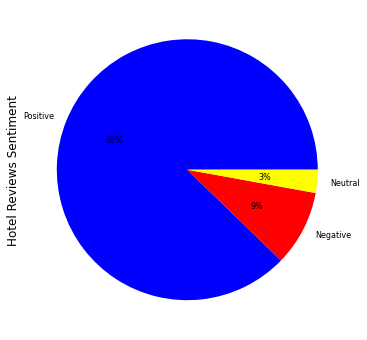

In [24]:
reviews.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%',  fontsize=8, figsize=(9,6), colors=["blue", "red", "yellow"])
plt.ylabel("Hotel Reviews Sentiment", size=12)

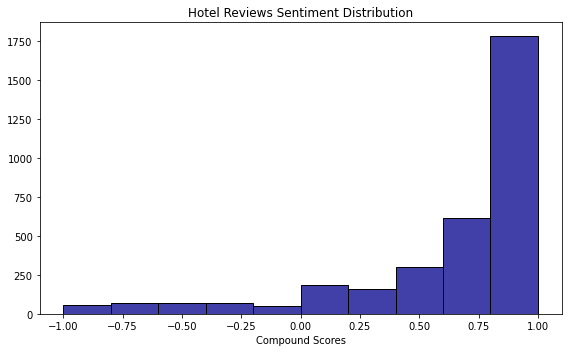

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(reviews, x='compound', color="darkblue", bins=10, binrange=(-1, 1))
plt.title("Hotel Reviews Sentiment Distribution")
plt.xlabel("Compound Scores")
plt.ylabel("")
plt.tight_layout()